###### WEEK 2 DATE: 24 MARCH 2022

#### EXER 1:

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 9. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.






Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Number of Instances: 768

Number of Attributes: 8 plus class

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [2]:
# Importing the dataset

df = pd.read_csv("diabetes.csv")
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [128]:
# Using the LabelEncoder function to convert target variable to float datatype.
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df['class'] = lb_make.fit_transform(df['class'])

In [129]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 We can observe the change in the datatype of values in the target variable

### 10. Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [131]:
desc = pd.DataFrame(df.describe().T)
desc[['mean','std']]

,mean,std
preg,3.845052,3.369578
plas,120.894531,31.972618
pres,69.105469,19.355807
skin,20.536458,15.952218
insu,79.799479,115.244002
mass,31.992578,7.884160
pedi,0.471876,0.331329
age,33.240885,11.760232
class,0.348958,0.476951


In [132]:
#Tabulating the 'age' attribute
pd.DataFrame(df['age'])

,age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


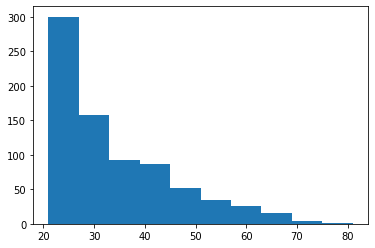

In [133]:
#Using a histogram to visualize 'age' attribute.
plt.hist(df['age'])
plt.show()

### 11. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

In [22]:
#Finding the correlation values to find the relation b/w atributes.
df_corr = df[['age','mass','class']].corr()
pd.DataFrame(df_corr['class'])

,class
age,0.238356
mass,0.292695
class,1.000000


<AxesSubplot:>

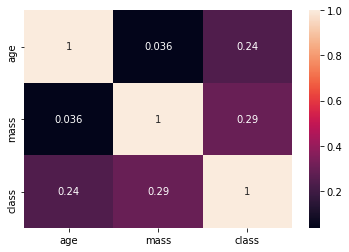

In [23]:
sns.heatmap(df_corr,annot=True)

In [24]:
a=df.pivot_table(index='class',values=['mass','age'])
a

,age,mass
class,,
0,31.190000,30.304200
1,37.067164,35.142537


### 12. Tabulate the class label and comment on whether the classes are balanced.


In [134]:
#Tabulating the count of class label to check whether the classes are balanced or not.
pd.DataFrame(df['class'].value_counts())

,class
0,500
1,268


<AxesSubplot:xlabel='class', ylabel='count'>

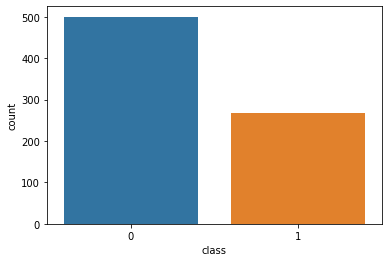

In [135]:
sns.countplot(x="class", data=df)

The class labels are not balanced.

### 13. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [136]:
# Assigning the predictor variables to 'x' and response variable to 'y'

x = df.drop('class',axis=1)
y = df['class']

# Using the standard scaler function for scaling the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [98]:
# Splitting the dataset into train and test data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)

# Using the linear_model module of sklearn to build a Logistic Regression model.
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
y_pred = logReg.predict(x_test)

In [137]:
# Computing the accuracy of our model using accuracy_score method.
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7965367965367965

### 14. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [118]:
# Using different evaluation metrics to evaluate the performance of our model.

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
print('Precision                                   : %.3f'%precision_score(y_test, y_pred))
print('Recall                                      : %.3f'%recall_score(y_test, y_pred))
print('F1-Score                                    : %.3f'%f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precision                                   : 0.692
Recall                                      : 0.625
F1-Score                                    : 0.657
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       159
           1       0.69      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231



In [138]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[139,  20],
       [ 27,  45]], dtype=int64)

<AxesSubplot:>

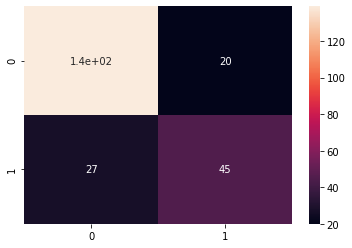

In [139]:
sns.heatmap(conf_matrix,annot = True)

### 15. Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [140]:
# Using the .ravel() method to get the values of True-Negative, False-Positive,
# False-Negative and True-Positive from the confusion matrix.
tn, fp, fn, tp = conf_matrix.ravel()

In [141]:
accuracy_rate = (tp + tn) / (tp+fp+fn+tn)
accuracy_rate

0.7965367965367965

Our model is around 78% accurate.

In [142]:
true_pos_rate = tp / (tp+fp)
true_pos_rate

0.6923076923076923

In [143]:
true_neg_rate = tn /(tn+fp)
true_neg_rate

0.8742138364779874

### 16. Visualize the ROC curve, and comment on the performance of the classifier.

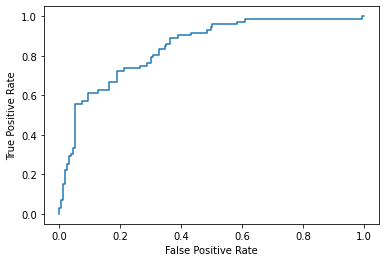

In [144]:
from sklearn.metrics import roc_curve

y_pred_proba = logReg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

The performance of the classifier depends on the area covered by the ROC curve, hence the more the curve is bent towards the left-top corner, the more accurate will our model be.